<a href="https://colab.research.google.com/github/nicocarrion1/DiploDatos_AyV_G5/blob/main/Curacion_de_datos_Entregable_Parte_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

import seaborn
seaborn.set_context('talk')

In [2]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pd.read_csv(
    'https://raw.githubusercontent.com/MaguiSella/AnalisisYCuracion/master/melbourn_housing1.csv')
melb_df.sample(5)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Propertycount,price_airbnb
785,Bentleigh East,4,h,1200000.0,S,hockingstuart,7/05/2016,3165.0,2.0,2.0,619.0,191.0,1960.0,Glen Eira,10969.0,113.039216
1002,Braybrook,4,h,856500.0,S,Sweeney,19/11/2016,3019.0,2.0,2.0,599.0,NaN,2008.0,Maribyrnong,3589.0,90.466667
11165,Ascot Vale,2,h,1035000.0,S,Alexkarbon,22/07/2017,3032.0,1.0,1.0,319.0,117.0,1900.0,Moonee Valley,6567.0,111.613636
2788,Glenroy,3,t,555000.0,SP,Stockdale,3/12/2016,3046.0,2.0,2.0,244.0,3.0,NaN,Moreland,8870.0,69.033333
2773,Glen Iris,5,h,2100000.0,S,Jellis,27/11/2016,3146.0,3.0,2.0,696.0,NaN,1989.0,Boroondara,10412.0,135.833333


In [3]:
melb_df[['CouncilArea','Suburb']].nunique()

CouncilArea     33
Suburb         310
dtype: int64

Para facilitar el trabajo del encoding, realizaremos algunas transformaciones más a los datos. Dado que Suburb y CouncilArea brindan información similar, pero una esta incluida en la otra, solo trabajaremos con la más agregada, lo que nos dejará 33 variables luego de aplicar el encoding, y no 310.

In [4]:
melb_df.drop('Suburb',
  axis='columns', inplace=True)

In [5]:
g=melb_df['SellerG'].value_counts().to_frame()
g['SellerG'].value_counts()


1       81
2       34
3       23
4       10
5       10
        ..
147      1
35       1
34       1
32       1
1520     1
Name: SellerG, Length: 71, dtype: int64

Se puede ver que hay muchos vendedores que solo tienen una venta, por lo tanto decidimos agruparlos en ciertos rangos

In [6]:
g=melb_df['SellerG'].value_counts().to_frame()
filtered = g[g['SellerG'].between(21,40,inclusive=True)]
melb_df['SellerG'].where(melb_df.loc[melb_df['SellerG'].isin(filtered.index),'SellerG'].isnull(),'UpperMedium',inplace=True)
filtered = g[g['SellerG'].between(11,20,inclusive=True)]
melb_df['SellerG'].where(melb_df.loc[melb_df['SellerG'].isin(filtered.index),'SellerG'].isnull(),'Medium',inplace=True)
filtered = g[g['SellerG']<11]
melb_df['SellerG'].where(melb_df.loc[melb_df['SellerG'].isin(filtered.index),'SellerG'].isnull(),'Casual',inplace=True)


In [7]:
melb_df['SellerG'].value_counts()

Nelson           1520
Jellis           1247
hockingstuart    1111
Barry             995
Ray               682
Marshall          624
Buxton            612
UpperMedium       534
Casual            506
Biggin            364
Medium            357
Brad              333
Fletchers         290
Woodards          286
Jas               239
Greg              230
Sweeney           211
McGrath           204
Noel              199
Miles             190
RT                181
Harcourts         164
Gary              163
Hodges            155
YPA               152
Stockdale         147
Village           125
Williams          107
Love              106
Raine             105
Kay               105
Douglas            94
Chisholm           71
RW                 68
Rendina            64
HAR                61
O'Brien            58
C21                56
Collins            51
Eview              49
Cayzer             49
Purplebricks       48
Philip             46
Bells              44
Buckingham         44
Name: Sell

Tambien vimos que hay muchos CouncilArea que tienen pocos valores asi que agrupamos los que tenian menos de 50 valores, los agrupamos con el valor "Otros"

In [8]:
g=melb_df['CouncilArea'].value_counts().to_frame()
filtered = g[g['CouncilArea']>50]
melb_df['CouncilArea'].where(melb_df.loc[~melb_df['CouncilArea'].isin(filtered.index),'CouncilArea'].isnull(),'Other',inplace=True)

In [9]:
melb_df['CouncilArea'].value_counts()

Moreland             2415
Boroondara           1109
Moonee Valley         979
Darebin               912
Glen Eira             828
Stonnington           675
Maribyrnong           666
Yarra                 605
Port Phillip          590
Banyule               581
Bayside               468
Hobsons Bay           428
Brimbank              417
Melbourne             416
Monash                329
Manningham            303
Whitehorse            300
Kingston              201
Whittlesea            165
Hume                  162
Other                 148
Wyndham                84
Maroondah              75
Knox                   74
Melton                 66
Greater Dandenong      51
Name: CouncilArea, dtype: int64

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [10]:
data_filtered= melb_df.drop(['BuildingArea', 'YearBuilt'], axis=1)
data_filtered.head()

,Rooms,Type,Price,Method,SellerG,Date,Postcode,Bathroom,Car,Landsize,CouncilArea,Propertycount,price_airbnb
0,2,h,1480000.0,S,Biggin,3/12/2016,3067.0,1.0,1.0,202.0,Yarra,4019.0,130.624031
1,2,h,1035000.0,S,Biggin,4/02/2016,3067.0,1.0,0.0,156.0,Yarra,4019.0,130.624031
2,3,h,1465000.0,SP,Biggin,4/03/2017,3067.0,2.0,0.0,134.0,Yarra,4019.0,130.624031
3,3,h,850000.0,PI,Biggin,4/03/2017,3067.0,2.0,1.0,94.0,Yarra,4019.0,130.624031
4,4,h,1600000.0,VB,Nelson,4/06/2016,3067.0,1.0,2.0,120.0,Yarra,4019.0,130.624031


In [12]:
#Usamos OneHotEncoding

df_categoricas = data_filtered.select_dtypes(include=['object','category']) #Separo las variables categoricas
df_categoricas_wo_date=df_categoricas.drop('Date', axis=1) #Quito las fechas
#df_categoricas_wo_date=df_categoricas_wo_date.drop('Suburb', axis=1)#Linea de prueba

df_categoricas_wo_date.head()


,Type,Method,SellerG,CouncilArea
0,h,S,Biggin,Yarra
1,h,S,Biggin,Yarra
2,h,SP,Biggin,Yarra
3,h,PI,Biggin,Yarra
4,h,VB,Nelson,Yarra


In [13]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(df_categoricas_wo_date) 
#Aplico el oneHot en las columnas categoricas del dataframe original
encoded_types = encoder.transform(data_filtered[list(df_categoricas_wo_date.columns)])


In [14]:
new_columns = []
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(df_categoricas_wo_date)
for col, col_values in zip(df_categoricas_wo_date, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))

In [15]:
#Creo un dataframe con el nuevo encoding generado
encoded_types_d=pd.DataFrame(encoded_types)
encoded_types_d.columns=new_columns
encoded_types_d.head()

,Type=h,Type=t,Type=u,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,SellerG=Barry,SellerG=Bells,SellerG=Biggin,SellerG=Brad,SellerG=Buckingham,SellerG=Buxton,SellerG=C21,SellerG=Casual,SellerG=Cayzer,SellerG=Chisholm,SellerG=Collins,SellerG=Douglas,SellerG=Eview,SellerG=Fletchers,SellerG=Gary,SellerG=Greg,SellerG=HAR,SellerG=Harcourts,SellerG=Hodges,SellerG=Jas,SellerG=Jellis,SellerG=Kay,SellerG=Love,SellerG=Marshall,SellerG=McGrath,SellerG=Medium,SellerG=Miles,SellerG=Nelson,SellerG=Noel,SellerG=O'Brien,SellerG=Philip,SellerG=Purplebricks,SellerG=RT,SellerG=RW,SellerG=Raine,SellerG=Ray,SellerG=Rendina,SellerG=Stockdale,SellerG=Sweeney,SellerG=UpperMedium,SellerG=Village,SellerG=Williams,SellerG=Woodards,SellerG=YPA,SellerG=hockingstuart,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Darebin,CouncilArea=Glen Eira,CouncilArea=Greater Dandenong,CouncilArea=Hobsons Bay,CouncilArea=Hume,CouncilArea=Kingston,CouncilArea=Knox,CouncilArea=Manningham,CouncilArea=Maribyrnong,CouncilArea=Maroondah,CouncilArea=Melbourne,CouncilArea=Melton,CouncilArea=Monash,CouncilArea=Moonee Valley,CouncilArea=Moreland,CouncilArea=Other,CouncilArea=Port Phillip,CouncilArea=Stonnington,CouncilArea=Whitehorse,CouncilArea=Whittlesea,CouncilArea=Wyndham,CouncilArea=Yarra
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
#Junto la informacion con el dataframe original 
data_w_encoding=data_filtered.join(encoded_types_d)
data_w_encoding.drop(df_categoricas, axis=1,inplace=True)
data_w_encoding.head()

,Rooms,Price,Postcode,Bathroom,Car,Landsize,Propertycount,price_airbnb,Type=h,Type=t,Type=u,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,SellerG=Barry,SellerG=Bells,SellerG=Biggin,SellerG=Brad,SellerG=Buckingham,SellerG=Buxton,SellerG=C21,SellerG=Casual,SellerG=Cayzer,SellerG=Chisholm,SellerG=Collins,SellerG=Douglas,SellerG=Eview,SellerG=Fletchers,SellerG=Gary,SellerG=Greg,SellerG=HAR,SellerG=Harcourts,SellerG=Hodges,SellerG=Jas,SellerG=Jellis,SellerG=Kay,SellerG=Love,SellerG=Marshall,...,SellerG=Purplebricks,SellerG=RT,SellerG=RW,SellerG=Raine,SellerG=Ray,SellerG=Rendina,SellerG=Stockdale,SellerG=Sweeney,SellerG=UpperMedium,SellerG=Village,SellerG=Williams,SellerG=Woodards,SellerG=YPA,SellerG=hockingstuart,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Darebin,CouncilArea=Glen Eira,CouncilArea=Greater Dandenong,CouncilArea=Hobsons Bay,CouncilArea=Hume,CouncilArea=Kingston,CouncilArea=Knox,CouncilArea=Manningham,CouncilArea=Maribyrnong,CouncilArea=Maroondah,CouncilArea=Melbourne,CouncilArea=Melton,CouncilArea=Monash,CouncilArea=Moonee Valley,CouncilArea=Moreland,CouncilArea=Other,CouncilArea=Port Phillip,CouncilArea=Stonnington,CouncilArea=Whitehorse,CouncilArea=Whittlesea,CouncilArea=Wyndham,CouncilArea=Yarra
0,2,1480000.0,3067.0,1.0,1.0,202.0,4019.0,130.624031,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1035000.0,3067.0,1.0,0.0,156.0,4019.0,130.624031,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1465000.0,3067.0,2.0,0.0,134.0,4019.0,130.624031,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,850000.0,3067.0,2.0,1.0,94.0,4019.0,130.624031,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,1600000.0,3067.0,1.0,2.0,120.0,4019.0,130.624031,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [17]:
#Probamos las 2 formas de imputacion. Primero utilizando solo las columnas YearBuilt y BuildingArea

from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])
melb_data_mice.head()

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


,Rooms,Type,Price,Method,SellerG,Date,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Propertycount,price_airbnb
0,2,h,1480000.0,S,Biggin,3/12/2016,3067.0,1.0,1.0,202.0,169.4,1968.0,Yarra,4019.0,130.624031
1,2,h,1035000.0,S,Biggin,4/02/2016,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,4019.0,130.624031
2,3,h,1465000.0,SP,Biggin,4/03/2017,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,4019.0,130.624031
3,3,h,850000.0,PI,Biggin,4/03/2017,3067.0,2.0,1.0,94.0,169.4,1968.0,Yarra,4019.0,130.624031
4,4,h,1600000.0,VB,Nelson,4/06/2016,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra,4019.0,130.624031


In [18]:
#Ahora imputamos con los datos posteriores a realizar el oneHotEncoding
data_w_encoding[['YearBuilt','BuildingArea']]=melb_df[['YearBuilt','BuildingArea']]
data_w_encoding_imp = data_w_encoding.copy(deep=True)
columns=data_w_encoding_imp.columns


In [19]:
data_w_encoding_imp=mice_imputer.fit_transform(
    data_w_encoding_imp)
data_w_encoding_imp=pd.DataFrame(data_w_encoding_imp, columns=columns)
data_w_encoding_imp.head()

,Rooms,Price,Postcode,Bathroom,Car,Landsize,Propertycount,price_airbnb,Type=h,Type=t,Type=u,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,SellerG=Barry,SellerG=Bells,SellerG=Biggin,SellerG=Brad,SellerG=Buckingham,SellerG=Buxton,SellerG=C21,SellerG=Casual,SellerG=Cayzer,SellerG=Chisholm,SellerG=Collins,SellerG=Douglas,SellerG=Eview,SellerG=Fletchers,SellerG=Gary,SellerG=Greg,SellerG=HAR,SellerG=Harcourts,SellerG=Hodges,SellerG=Jas,SellerG=Jellis,SellerG=Kay,SellerG=Love,SellerG=Marshall,...,SellerG=RW,SellerG=Raine,SellerG=Ray,SellerG=Rendina,SellerG=Stockdale,SellerG=Sweeney,SellerG=UpperMedium,SellerG=Village,SellerG=Williams,SellerG=Woodards,SellerG=YPA,SellerG=hockingstuart,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Darebin,CouncilArea=Glen Eira,CouncilArea=Greater Dandenong,CouncilArea=Hobsons Bay,CouncilArea=Hume,CouncilArea=Kingston,CouncilArea=Knox,CouncilArea=Manningham,CouncilArea=Maribyrnong,CouncilArea=Maroondah,CouncilArea=Melbourne,CouncilArea=Melton,CouncilArea=Monash,CouncilArea=Moonee Valley,CouncilArea=Moreland,CouncilArea=Other,CouncilArea=Port Phillip,CouncilArea=Stonnington,CouncilArea=Whitehorse,CouncilArea=Whittlesea,CouncilArea=Wyndham,CouncilArea=Yarra,YearBuilt,BuildingArea
0,2.0,1480000.0,3067.0,1.0,1.0,202.0,4019.0,130.624031,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1930.8,162.80000
1,2.0,1035000.0,3067.0,1.0,0.0,156.0,4019.0,130.624031,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1900.0,79.00000
2,3.0,1465000.0,3067.0,2.0,0.0,134.0,4019.0,130.624031,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1900.0,150.00000
3,3.0,850000.0,3067.0,2.0,1.0,94.0,4019.0,130.624031,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1959.4,145.98702
4,4.0,1600000.0,3067.0,1.0,2.0,120.0,4019.0,130.624031,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2014.0,142.00000


In [20]:
print('Variables imputadas solo con YearBuilt y BuildingArea')
display(melb_data_mice[['YearBuilt','BuildingArea']].describe())
print('Variables imputadas con todo el dataset despues del encoding')
display(data_w_encoding_imp[['YearBuilt', 'BuildingArea']].describe())

Variables imputadas solo con YearBuilt y BuildingArea


,YearBuilt,BuildingArea
count,13047.000000,13047.000000
mean,1965.842293,151.971038
std,28.241039,54.481640
min,1850.000000,0.000000
25%,1960.000000,118.000000
50%,1968.000000,169.400000
75%,1975.000000,169.400000
max,2017.000000,495.000000


Variables imputadas con todo el dataset despues del encoding


,YearBuilt,BuildingArea
count,13047.000000,13047.000000
mean,1963.897156,140.632591
std,30.850494,61.895370
min,1850.000000,0.000000
25%,1948.000000,101.000000
50%,1967.400000,130.000000
75%,1985.000000,168.600000
max,2017.000000,495.000000


In [21]:

mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'
melb_year_built_encoding = data_w_encoding_imp.YearBuilt.to_frame()
melb_year_built_encoding['Imputation'] = 'KNN with all columns'
melb_year_built_original = data_w_encoding_imp.YearBuilt.dropna().to_frame()
melb_year_built_original['Imputation'] = 'Original'

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

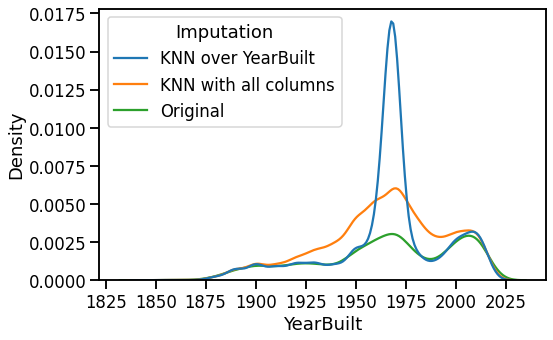

In [23]:

mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'
melb_year_built_encoding = data_w_encoding_imp.YearBuilt.to_frame()
melb_year_built_encoding['Imputation'] = 'KNN with all columns'
melb_year_built_original = melb_df.YearBuilt.dropna().to_frame()
melb_year_built_original['Imputation'] = 'Original'
data = pd.concat([mice_year_built, melb_year_built_encoding,melb_year_built_original ])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

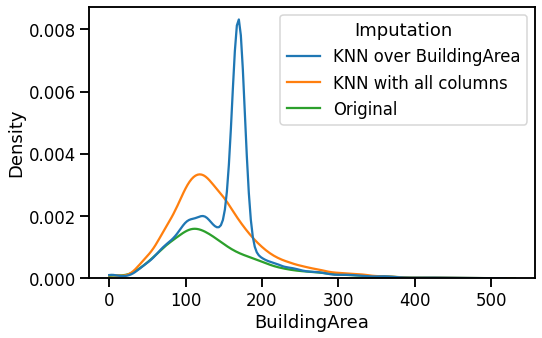

In [24]:
mice_year_built = melb_data_mice.BuildingArea.to_frame()
mice_year_built['Imputation'] = 'KNN over BuildingArea'
melb_year_built_encoding = data_w_encoding_imp.BuildingArea.to_frame()
melb_year_built_encoding['Imputation'] = 'KNN with all columns'
melb_year_built_original = melb_df.BuildingArea.dropna().to_frame()
melb_year_built_original['Imputation'] = 'Original'
data = pd.concat([mice_year_built, melb_year_built_encoding,melb_year_built_original ])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation', clip=(0,1000))

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [25]:
data_w_encoding_imp.describe()

,Rooms,Price,Postcode,Bathroom,Car,Landsize,Propertycount,price_airbnb,Type=h,Type=t,Type=u,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,SellerG=Barry,SellerG=Bells,SellerG=Biggin,SellerG=Brad,SellerG=Buckingham,SellerG=Buxton,SellerG=C21,SellerG=Casual,SellerG=Cayzer,SellerG=Chisholm,SellerG=Collins,SellerG=Douglas,SellerG=Eview,SellerG=Fletchers,SellerG=Gary,SellerG=Greg,SellerG=HAR,SellerG=Harcourts,SellerG=Hodges,SellerG=Jas,SellerG=Jellis,SellerG=Kay,SellerG=Love,SellerG=Marshall,...,SellerG=RW,SellerG=Raine,SellerG=Ray,SellerG=Rendina,SellerG=Stockdale,SellerG=Sweeney,SellerG=UpperMedium,SellerG=Village,SellerG=Williams,SellerG=Woodards,SellerG=YPA,SellerG=hockingstuart,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Darebin,CouncilArea=Glen Eira,CouncilArea=Greater Dandenong,CouncilArea=Hobsons Bay,CouncilArea=Hume,CouncilArea=Kingston,CouncilArea=Knox,CouncilArea=Manningham,CouncilArea=Maribyrnong,CouncilArea=Maroondah,CouncilArea=Melbourne,CouncilArea=Melton,CouncilArea=Monash,CouncilArea=Moonee Valley,CouncilArea=Moreland,CouncilArea=Other,CouncilArea=Port Phillip,CouncilArea=Stonnington,CouncilArea=Whitehorse,CouncilArea=Whittlesea,CouncilArea=Wyndham,CouncilArea=Yarra,YearBuilt,BuildingArea
count,13047.000000,1.304700e+04,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,...,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000,13047.000000
mean,2.949337,1.075169e+06,3104.591784,1.530697,1.604277,417.074117,7445.872001,736.281637,0.704913,0.083697,0.21139,0.113819,0.669579,0.006745,0.124090,0.085767,0.076263,0.003372,0.027899,0.025523,0.003372,0.046907,0.004292,0.038783,0.003756,0.005442,0.003909,0.007205,0.003756,0.022227,0.012493,0.017629,0.004675,0.012570,0.011880,0.018318,0.095578,0.008048,0.008124,0.047827,...,0.005212,0.008048,0.052273,0.004905,0.011267,0.016172,0.040929,0.009581,0.008201,0.021921,0.01165,0.085154,0.044531,0.035870,0.085000,0.031961,0.069901,0.063463,0.003909,0.032804,0.012417,0.015406,0.005672,0.023224,0.051046,0.005748,0.031885,0.005059,0.025217,0.075036,0.185100,0.011344,0.045221,0.051736,0.022994,0.012647,0.006438,0.046371,1963.897156,140.632591
std,0.943259,6.265884e+05,89.485543,0.667312,0.924478,291.982819,4382.421537,18348.051373,0.456099,0.276944,0.40831,0.317604,0.470383,0.081853,0.329697,0.280030,0.265428,0.057977,0.164690,0.157714,0.057977,0.211448,0.065376,0.193084,0.061171,0.073571,0.062402,0.084578,0.061171,0.147428,0.111077,0.131602,0.068220,0.111413,0.108351,0.134105,0.294022,0.089351,0.089772,0.213408,...,0.072008,0.089351,0.222585,0.069869,0.105550,0.126143,0.198133,0.097415,0.090191,0.146430,0.10731,0.279121,0.206280,0.185974,0.278893,0.175904,0.254990,0.243803,0.062402,0.178131,0.110740,0.123165,0.075100,0.150619,0.220100,0.075603,0.175700,0.070947,0.156788,0.263460,0.388394,0.105905,0.207797,0.221502,0.149889,0.111748,0.079983,0.210295,30.850494,61.895370
min,1.000000,8.500000e+04,3000.000000,1.000000,0.000000,0.000000,389.000000,40.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [26]:
#Escalamos las variables
from sklearn.preprocessing import StandardScaler
columns_to_scale=['Postcode', 'price_airbnb', 'YearBuilt', 'BuildingArea', 'Landsize', 'Propertycount', 'Rooms', 'Car', 'Bathroom']
data_w_encoding_imp[columns_to_scale].head()
scaler=StandardScaler()
data_w_encoding_imp_scale=data_w_encoding_imp.copy(deep=True) #Asigno una nueva variable
data_w_encoding_imp_scale[columns_to_scale] = scaler.fit_transform(data_w_encoding_imp[columns_to_scale])
data_w_encoding_imp_scale.head()

,Rooms,Price,Postcode,Bathroom,Car,Landsize,Propertycount,price_airbnb,Type=h,Type=t,Type=u,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,SellerG=Barry,SellerG=Bells,SellerG=Biggin,SellerG=Brad,SellerG=Buckingham,SellerG=Buxton,SellerG=C21,SellerG=Casual,SellerG=Cayzer,SellerG=Chisholm,SellerG=Collins,SellerG=Douglas,SellerG=Eview,SellerG=Fletchers,SellerG=Gary,SellerG=Greg,SellerG=HAR,SellerG=Harcourts,SellerG=Hodges,SellerG=Jas,SellerG=Jellis,SellerG=Kay,SellerG=Love,SellerG=Marshall,...,SellerG=RW,SellerG=Raine,SellerG=Ray,SellerG=Rendina,SellerG=Stockdale,SellerG=Sweeney,SellerG=UpperMedium,SellerG=Village,SellerG=Williams,SellerG=Woodards,SellerG=YPA,SellerG=hockingstuart,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Darebin,CouncilArea=Glen Eira,CouncilArea=Greater Dandenong,CouncilArea=Hobsons Bay,CouncilArea=Hume,CouncilArea=Kingston,CouncilArea=Knox,CouncilArea=Manningham,CouncilArea=Maribyrnong,CouncilArea=Maroondah,CouncilArea=Melbourne,CouncilArea=Melton,CouncilArea=Monash,CouncilArea=Moonee Valley,CouncilArea=Moreland,CouncilArea=Other,CouncilArea=Port Phillip,CouncilArea=Stonnington,CouncilArea=Whitehorse,CouncilArea=Whittlesea,CouncilArea=Wyndham,CouncilArea=Yarra,YearBuilt,BuildingArea
0,-1.006482,1480000.0,-0.420104,-0.795306,-0.653666,-0.736627,-0.781989,-0.033011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.072865,0.358157
1,-1.006482,1035000.0,-0.420104,-0.795306,-1.735400,-0.894176,-0.781989,-0.033011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.071267,-0.995793
2,0.053713,1465000.0,-0.420104,0.703301,-1.735400,-0.969526,-0.781989,-0.033011,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.071267,0.151348
3,0.053713,850000.0,-0.420104,0.703301,-0.653666,-1.106526,-0.781989,-0.033011,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.145778,0.086511
4,1.113908,1600000.0,-0.420104,-0.795306,0.428067,-1.017476,-0.781989,-0.033011,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.624115,0.022093


In [27]:
data_w_encoding_imp_scale_test= data_w_encoding_imp_scale.drop('Price', axis=1)
data_w_encoding_imp_scale_test.head()

,Rooms,Postcode,Bathroom,Car,Landsize,Propertycount,price_airbnb,Type=h,Type=t,Type=u,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,SellerG=Barry,SellerG=Bells,SellerG=Biggin,SellerG=Brad,SellerG=Buckingham,SellerG=Buxton,SellerG=C21,SellerG=Casual,SellerG=Cayzer,SellerG=Chisholm,SellerG=Collins,SellerG=Douglas,SellerG=Eview,SellerG=Fletchers,SellerG=Gary,SellerG=Greg,SellerG=HAR,SellerG=Harcourts,SellerG=Hodges,SellerG=Jas,SellerG=Jellis,SellerG=Kay,SellerG=Love,SellerG=Marshall,SellerG=McGrath,...,SellerG=RW,SellerG=Raine,SellerG=Ray,SellerG=Rendina,SellerG=Stockdale,SellerG=Sweeney,SellerG=UpperMedium,SellerG=Village,SellerG=Williams,SellerG=Woodards,SellerG=YPA,SellerG=hockingstuart,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Darebin,CouncilArea=Glen Eira,CouncilArea=Greater Dandenong,CouncilArea=Hobsons Bay,CouncilArea=Hume,CouncilArea=Kingston,CouncilArea=Knox,CouncilArea=Manningham,CouncilArea=Maribyrnong,CouncilArea=Maroondah,CouncilArea=Melbourne,CouncilArea=Melton,CouncilArea=Monash,CouncilArea=Moonee Valley,CouncilArea=Moreland,CouncilArea=Other,CouncilArea=Port Phillip,CouncilArea=Stonnington,CouncilArea=Whitehorse,CouncilArea=Whittlesea,CouncilArea=Wyndham,CouncilArea=Yarra,YearBuilt,BuildingArea
0,-1.006482,-0.420104,-0.795306,-0.653666,-0.736627,-0.781989,-0.033011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.072865,0.358157
1,-1.006482,-0.420104,-0.795306,-1.735400,-0.894176,-0.781989,-0.033011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.071267,-0.995793
2,0.053713,-0.420104,0.703301,-1.735400,-0.969526,-0.781989,-0.033011,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.071267,0.151348
3,0.053713,-0.420104,0.703301,-0.653666,-1.106526,-0.781989,-0.033011,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.145778,0.086511
4,1.113908,-0.420104,-0.795306,0.428067,-1.017476,-0.781989,-0.033011,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.624115,0.022093


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(data_w_encoding_imp_scale_test)
proyected_features = pca.transform(data_w_encoding_imp_scale_test)
proyected_features.shape

(13047, 20)

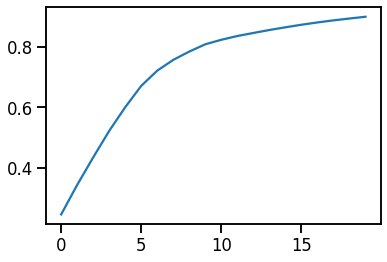

In [29]:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [30]:
pca.explained_variance_ratio_

array([0.24503404, 0.09777062, 0.09123181, 0.08778326, 0.07847844,
       0.0707213 , 0.05040435, 0.03569528, 0.02745106, 0.02413774,
       0.01488551, 0.01250827, 0.01004347, 0.00985573, 0.00891027,
       0.00853118, 0.00759772, 0.00684404, 0.00617123, 0.00584064])

Text(0.5, 0, 'Components')

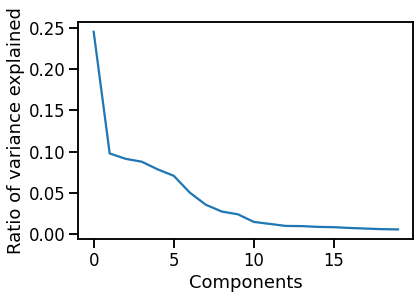

In [31]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")

In [32]:
n_features=8
columns_names_pca=[f'pca{i+1}_scaled' for i in range(n_features)]
data_w_encoding_imp[columns_names_pca]=proyected_features[:,:n_features]

In [33]:
data_w_encoding_imp.head()


,Rooms,Price,Postcode,Bathroom,Car,Landsize,Propertycount,price_airbnb,Type=h,Type=t,Type=u,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,SellerG=Barry,SellerG=Bells,SellerG=Biggin,SellerG=Brad,SellerG=Buckingham,SellerG=Buxton,SellerG=C21,SellerG=Casual,SellerG=Cayzer,SellerG=Chisholm,SellerG=Collins,SellerG=Douglas,SellerG=Eview,SellerG=Fletchers,SellerG=Gary,SellerG=Greg,SellerG=HAR,SellerG=Harcourts,SellerG=Hodges,SellerG=Jas,SellerG=Jellis,SellerG=Kay,SellerG=Love,SellerG=Marshall,...,SellerG=Williams,SellerG=Woodards,SellerG=YPA,SellerG=hockingstuart,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Darebin,CouncilArea=Glen Eira,CouncilArea=Greater Dandenong,CouncilArea=Hobsons Bay,CouncilArea=Hume,CouncilArea=Kingston,CouncilArea=Knox,CouncilArea=Manningham,CouncilArea=Maribyrnong,CouncilArea=Maroondah,CouncilArea=Melbourne,CouncilArea=Melton,CouncilArea=Monash,CouncilArea=Moonee Valley,CouncilArea=Moreland,CouncilArea=Other,CouncilArea=Port Phillip,CouncilArea=Stonnington,CouncilArea=Whitehorse,CouncilArea=Whittlesea,CouncilArea=Wyndham,CouncilArea=Yarra,YearBuilt,BuildingArea,pca1_scaled,pca2_scaled,pca3_scaled,pca4_scaled,pca5_scaled,pca6_scaled,pca7_scaled,pca8_scaled
0,2.0,1480000.0,3067.0,1.0,1.0,202.0,4019.0,130.624031,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1930.8,162.80000,-1.062864,-1.375219,-0.096643,0.307653,-0.798362,0.247859,0.223315,0.972022
1,2.0,1035000.0,3067.0,1.0,0.0,156.0,4019.0,130.624031,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1900.0,79.00000,-2.073597,-2.234250,0.456165,0.372772,-1.270576,0.548257,0.237557,-0.300468
2,3.0,1465000.0,3067.0,2.0,0.0,134.0,4019.0,130.624031,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1900.0,150.00000,-0.418064,-1.767868,0.167012,0.081519,-1.828104,1.678641,0.353492,-0.465712
3,3.0,850000.0,3067.0,2.0,1.0,94.0,4019.0,130.624031,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1959.4,145.98702,-0.220508,-0.187100,-0.797820,0.069071,-0.997072,1.060611,0.414478,-0.216289
4,4.0,1600000.0,3067.0,1.0,2.0,120.0,4019.0,130.624031,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2014.0,142.00000,-0.050597,0.699728,-1.567996,0.199776,0.192071,-0.073936,0.014135,0.210359


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

Esto ya fue aplicado previamente

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
